In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape


(50000, 1)

In [5]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train.ndim # this denotes it`s a 2D array

2

In [8]:
y_train = y_train.reshape(-1,) # convert to 1d
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_train.ndim # now it has become 1d

1

In [10]:
y_test = y_test.reshape(-1,) # re-shape the y axis as well

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
# for image plotting
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


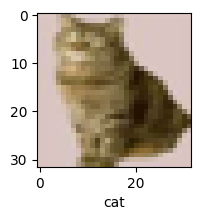

In [15]:
plot_sample(X_train, y_train, 12225)


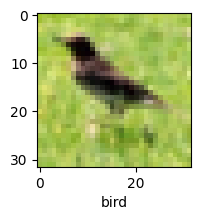

In [ ]:
plot_sample(X_train, y_train, 45021)

In [ ]:
# normalize training data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
# simple ANN - accuracy is low compared to CNN
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes to be outputed
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 126s 80ms/step - loss: nan - accuracy: 0.1002
Epoch 2/5
1563/1563 [==============================] - 125s 80ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 125s 80ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 125s 80ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 125s 80ms/step - loss: nan - accuracy: 0.1000


In [ ]:
# derive a clasification report for the 10 classes
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.32      0.45      1000
           1       0.50      0.66      0.57      1000
           2       0.46      0.19      0.27      1000
           3       0.36      0.25      0.30      1000
           4       0.58      0.23      0.33      1000
           5       0.32      0.49      0.39      1000
           6       0.45      0.66      0.53      1000
           7       0.59      0.45      0.51      1000
           8       0.58      0.62      0.60      1000
           9       0.38      0.71      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000



In [17]:
# define high accurate CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 52s 32ms/step - loss: 2.2679 - accuracy: 0.2644
Epoch 2/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4269 - accuracy: 0.4875
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2083 - accuracy: 0.5752
Epoch 4/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0817 - accuracy: 0.6234
Epoch 5/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9893 - accuracy: 0.6572


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9377 - accuracy: 0.6922


[0.9377458095550537, 0.6922000050544739]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.4908674e-03, 1.0147246e-05, 6.1776683e-02, 7.0458162e-01,
        3.5941335e-03, 2.1253419e-01, 3.6008940e-03, 3.1905137e-03,
        5.1300577e-03, 9.0841648e-05],
       [4.2236099e-04, 4.6995152e-03, 1.3979718e-07, 1.7947327e-08,
        2.0777520e-09, 1.3002817e-08, 1.0521770e-08, 9.8189867e-10,
        9.9482006e-01, 5.7922614e-05],
       [3.3015277e-02, 2.4546923e-01, 2.0678160e-03, 3.7053542e-03,
        8.9501601e-04, 7.5616472e-04, 1.2223057e-04, 4.9320125e-04,
        6.9090915e-01, 2.2566602e-02],
       [8.6586630e-01, 8.0008275e-04, 1.5336747e-02, 8.4178697e-04,
        4.4005685e-03, 5.6832540e-04, 9.3976833e-04, 5.5674679e-04,
        1.1068174e-01, 7.9253496e-06],
       [5.3417971e-05, 3.1073292e-04, 5.9530996e-02, 2.4605791e-01,
        6.0111934e-01, 1.5732184e-02, 7.6759972e-02, 8.5803717e-05,
        3.4425533e-04, 5.3870340e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

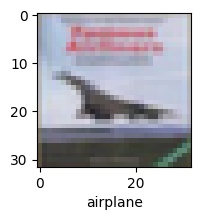

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'